In [1]:
import sys 
sys.path.append('/pl/active/banich/studies/Relevantstudies/abcd/env/lib/python3.7/site-packages')
sys.path.append('/pl/active/banich/studies/Clearvale/jake_scripts/Amy_flywheel_scripts/')

import numpy as np
import pandas as pd
import os



In [2]:
z_data = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/ClearMem_Z_Average.csv')
z_data = z_data[['SubID', 'z_ave', 'PSWQ_total', 'WBSI_total', 'RRS_total', 'RRS_depression', 'RRS_brooding', 'RRS_reflection']]
z_data = z_data.dropna()

from scipy.stats import zscore
z_data['br_z_ave'] = z_data['z_ave']
z_data.drop('z_ave', axis=1, inplace=True)
z_data['b_z_ave'] = (zscore(z_data['PSWQ_total']) + zscore(z_data['WBSI_total']) + zscore(z_data['RRS_brooding']))/3
z_data['thought_problems'] = (zscore(z_data['PSWQ_total']) + zscore(z_data['WBSI_total']) + zscore(z_data['RRS_brooding']) + zscore(z_data['RRS_reflection']) + zscore(z_data['RRS_depression']))/5

z_data = z_data.drop(['PSWQ_total', 'WBSI_total','RRS_total', 'RRS_depression', 
                     'RRS_brooding', 'RRS_reflection', 'br_z_ave'], axis=1)


In [3]:
auc = pd.read_csv('/pl/active/banich/studies/wmem/fmri/mvpa/utaustin/data/group_mvpa_auc/operation_mvpa_auc_n55.csv')
# Assuming your DataFrame is named 'auc'
auc.rename(columns=lambda col: 'SubID' if col == 'subject' else f"{col}_acc", inplace=True)
auc.drop('all_acc', axis=1, inplace=True)
auc.query('SubID != 34', inplace=True)

classifiers = (pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/dispersion_data/derosa_task_classifiers.csv')
               .drop('Unnamed: 0', axis=1).filter(regex='Sub|acc'))

In [4]:
#sub_range_df = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/dispersion_data/derosa_task_gradient_range.csv')

task_rsa_disp = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/regressions/data/rsa/dispersion_metrics_z.csv')
task_rsa_disp = pd.merge(z_data[['SubID', 'thought_problems', 'b_z_ave']],  task_rsa_disp, on='SubID')
task_rsa_disp.query('SubID != 34', inplace = True)
# Assuming 'task_rsa_disp' is your DataFrame
#task_rsa_disp = task_rsa_disp.loc[:, ~task_rsa_disp.columns.str.endswith('_acc')]
task_rsa_disp = pd.merge(task_rsa_disp, classifiers, on ='SubID')

In [5]:
task_fc_disp = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/regressions/data/task/dispersion_metrics_z.csv')

task_fc_disp = task_fc_disp.loc[:, ~task_fc_disp.columns.str.endswith('_acc')]
task_fc_disp = pd.merge(task_fc_disp, classifiers, on ='SubID')

#task_fc_disp = pd.merge(task_fc_disp, task_rsa_disp.filter(regex='SubID|acc'), on='SubID')

In [6]:
#task_rsa_disp = task_rsa_disp.drop('thought_problems', axis=1).rename({'b_z_ave':'thought_problems'}, axis=1)
#task_fc_disp = task_fc_disp.drop('thought_problems', axis=1).rename({'b_z_ave':'thought_problems'}, axis=1)

In [7]:
ids = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/subj/matched_subid.csv')

vals = (task_rsa_disp[['SubID', 'thought_problems', 'main_fpcn_dispersion_md']]
 .sort_values('main_fpcn_dispersion_md'))

#pd.merge(ids, vals, on='SubID').sort_values('main_fpcn_dispersion_md')

In [8]:
rsa_acc = task_rsa_disp.filter(regex='SubID|dispersion|acc')#.drop('total_acc', axis=1)
rsa_acc.to_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/regressions/dispersion_acc.csv', index=False)

In [9]:
acc_subs = task_rsa_disp.filter(regex='SubID|acc')
acc_subs.to_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/regressions/acc.csv', index=False)

In [10]:
subjects = pd.read_csv('/pl/active/banich/studies/wmem/fmri/mvpa/utaustin/data/group_mvpa_auc/ClearMem_Z_Average.csv')
subjects = pd.merge(task_rsa_disp[['SubID']], subjects, on ='SubID')

In [11]:
age = subjects
# Assuming 'age' is already merged and filtered
# Calculate mean, standard deviation for Age
mean_age = age['Age'].mean()
std_age = age['Age'].std()

# Calculate the counts and percentages for Gender
gender_counts = age['Gender_1F_2M'].value_counts()
gender_percentages = age['Gender_1F_2M'].value_counts(normalize=True) * 100

# Create a DataFrame to present the results in APA format
results_df = pd.DataFrame({
    "Measure": ["Mean Age", "Standard Deviation of Age", "Female (Count)", "Male (Count)", "Female (%)", "Male (%)"],
    "Value": [
        round(mean_age, 2),  # Mean Age rounded to 2 decimal places
        round(std_age, 2),   # Standard Deviation of Age rounded to 2 decimal places
        gender_counts.get(1, 0),  # Female count (1 represents female in Gender_1F_2M)
        gender_counts.get(2, 0),  # Male count (2 represents male in Gender_1F_2M)
        round(gender_percentages.get(1, 0), 2),  # Female percentage rounded
        round(gender_percentages.get(2, 0), 2)   # Male percentage rounded
    ]
})

results_df

,Measure,Value
0,Mean Age,23.65
1,Standard Deviation of Age,5.06
2,Female (Count),32.00
3,Male (Count),16.00
4,Female (%),66.67
5,Male (%),33.33


In [12]:
#task_rsa_disp['thought_problems'] = subjects['WBSI_total']
#task_fc_disp['thought_problems'] = subjects['WBSI_total']

In [13]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools

class RegressionAnalysis:
    def __init__(self, data, variable_list, target='thought_problems', interaction=None):
        self.data = data
        self.variable_list = variable_list
        self.target = target
        self.interaction = interaction
        self.regression_results = {}
        self.regression_models = {}

    def run_regression(self, target, y_vars):
        if self.interaction is not None:
            if len(y_vars) > 1:
                joined_vars = ' * '.join(y_vars)
            else:
                joined_vars = y_vars[0]
            formula = f'{target} ~ {joined_vars}'
        else:
            joined_vars = ' + '.join(y_vars)
            formula = f'{target} ~ {joined_vars}'

        model = smf.ols(formula=formula, data=self.data).fit()
        summary = model.summary()
        var = pd.DataFrame(summary.tables[0].data).iloc[0, 1]

        table1 = pd.DataFrame(summary.tables[0].data).iloc[:4, 3:].T.assign(var=var)
        table1.columns = ['r2', 'adjr2', 'fstat', 'pval', 'var']
        table1 = table1[['var', 'r2', 'adjr2', 'fstat', 'pval']]

        table2_cols = pd.DataFrame(summary.tables[1].data).loc[0].to_list() + ['var']
        table2_cols[0] = 'parameter'
        table2 = pd.DataFrame(summary.tables[1].data).iloc[1:].assign(var=var)
        table2.columns = table2_cols
        table2 = table2[['var', 'parameter', 'coef', 'std err', 't', 'P>|t|']]

        df = pd.merge(table1, table2, how='outer', left_on='var', right_on='parameter')
        df['var'] = df['var_x'].fillna(df['var_y'])
        df.drop(columns=['var_x', 'var_y'], inplace=True)
        df = df[['var'] + [col for col in df.columns if col != 'var']]
        df = df.assign(formula=formula)

        return df, model

    def run_all_regressions(self):
        for metric in self.variable_list:
            df, model = self.run_regression(self.target, [metric])
            self.regression_results[metric] = df
            self.regression_models[metric] = model

    def get_combined_results(self):
        combined_results = []
        for metric in self.regression_results:
            combined_results.append(self.regression_results[metric])

        output_regressions = pd.concat(combined_results, ignore_index=True)
        columns_to_convert = ['r2', 'adjr2', 'fstat', 'pval', 'coef', 'std err', 't', 'P>|t|']
        for column in columns_to_convert:
            output_regressions[column] = pd.to_numeric(output_regressions[column], errors='coerce')

        return output_regressions
    
def clean_formulas(dataframe, pval_threshold=0.05, target_prefix='thought_problems ~ '):
    """
    Filters formulas in a DataFrame based on p-value and removes the target prefix from each formula.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the regression results.
    pval_threshold (float): The p-value threshold for filtering formulas. Default is 0.05.
    target_prefix (str): The prefix to remove from each formula. Default is 'thought_problems ~ '.

    Returns:
    list: A list of cleaned formulas.
    """
    filtered_formulas = dataframe.query('pval < @pval_threshold').formula.to_list()
    cleaned_formulas = [formula.replace(target_prefix, '') for formula in filtered_formulas]
    return cleaned_formulas

In [14]:
def format_og_regs(regressions_table, neural_met):
    
    regressions_table = regressions_table.query('parameter != "Intercept"')
    
    outs = (regressions_table
     .melt(id_vars='formula')
     .dropna()
     .query('value != "thought_problems"')
     .reset_index()
     .pivot(index=['index', 'formula'], columns='variable', values='value')
    ).reset_index().sort_values('formula')

    # Group by formula and aggregate the non-NA values
    agg_funcs = {col: 'first' for col in outs.columns if col != 'formula'}
    collapsed_df = outs.groupby('formula').agg(agg_funcs).reset_index().assign(data_type = neural_met)

    collapsed_df = collapsed_df[['data_type', 'parameter', 'fstat', 'r2', 'adjr2', 'std err', 't', 'pval',]]
    
    return collapsed_df

In [15]:
#task_rsa_disp.filter(regex='SubID|main_dmn_disp').sort_values(by='main_dmn_dispersion_md')

In [16]:
# ACC Models
#task_rsa_disp['total_msc_acc'] = (task_rsa_disp['maintain_acc'] +  task_rsa_disp['suppress_acc'] + task_rsa_disp['clear_acc'])/3
#task_fc_disp['total_msc_acc'] = (task_fc_disp['maintain_acc'] +  task_fc_disp['suppress_acc'] + task_fc_disp['clear_acc'])/3

In [17]:
data = task_rsa_disp[['maintain_acc', 'replace_acc', 'suppress_acc', 'clear_acc']]#.corr()

from sklearn.decomposition import PCA

# Performing PCA
pca = PCA(n_components=1)
pca_scores = pca.fit_transform(data)*-1

# Creating a DataFrame for PCA scores
pca_df = pd.DataFrame(pca_scores, columns=['PC1'])

task_rsa_disp['total_msc_acc'] = pca_df['PC1']
task_fc_disp['total_msc_acc'] = pca_df['PC1']

# Extracting the explained variance ratio for the first component
explained_variance_ratio = pca.explained_variance_ratio_[0]

explained_variance_ratio

0.8826571772648941

In [18]:
#task_rsa_disp['total_msc_acc'] = (task_rsa_disp['maintain_acc'] + task_fc_disp['replace_acc'] + task_rsa_disp['suppress_acc'] + task_rsa_disp['clear_acc'])/4
#task_fc_disp['total_msc_acc'] = (task_fc_disp['maintain_acc'] + task_fc_disp['replace_acc'] + task_fc_disp['suppress_acc'] + task_fc_disp['clear_acc'])/4

In [19]:
# Usage example
acc_list = ['maintain_acc', 'replace_acc', 'suppress_acc', 'clear_acc', 'total_msc_acc']
acc_analysis = RegressionAnalysis(task_rsa_disp, acc_list)
acc_analysis.run_all_regressions()
acc_output_regressions = acc_analysis.get_combined_results()
acc_regression_models = acc_analysis.regression_models
acc_sig_vars = clean_formulas(acc_output_regressions)

In [20]:
acc_sig_vars 

['maintain_acc', 'suppress_acc', 'clear_acc', 'total_msc_acc']

In [21]:
task_rsa_disp[['maintain_acc', 'replace_acc', 'suppress_acc', 'clear_acc', 'total_msc_acc']].corr()

,maintain_acc,replace_acc,suppress_acc,clear_acc,total_msc_acc
maintain_acc,1.000000,0.802539,0.830215,0.887388,-0.942642
replace_acc,0.802539,1.000000,0.791909,0.800319,-0.885993
suppress_acc,0.830215,0.791909,1.000000,0.892013,-0.946471
clear_acc,0.887388,0.800319,0.892013,1.000000,-0.963399
total_msc_acc,-0.942642,-0.885993,-0.946471,-0.963399,1.000000


In [24]:
annot_masked

,suppress_dmn_eccentricity,suppress_vn_eccentricity,main_dmn_dispersion_md,replace_dmn_dispersion_md,replace_smn_dispersion_md,suppress_fpcn_dispersion_md,clear_dmn_dispersion_md,total_msc_acc
suppress_dmn_eccentricity,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
suppress_vn_eccentricity,-0.03,1.0,NaN,NaN,NaN,NaN,NaN,NaN
main_dmn_dispersion_md,-0.07,0.16,1.0,NaN,NaN,NaN,NaN,NaN
replace_dmn_dispersion_md,-0.09,0.1,0.78*,1.0,NaN,NaN,NaN,NaN
replace_smn_dispersion_md,-0.07,0.17,-0.16,-0.15,1.0,NaN,NaN,NaN
suppress_fpcn_dispersion_md,-0.27,-0.06,0.46*,0.43*,0.09,1.0,NaN,NaN
clear_dmn_dispersion_md,0.01,0.09,0.66*,0.71*,-0.19,0.36*,1.0,NaN
total_msc_acc,-0.15,0.12,0.27,0.17,-0.34*,0.3*,0.18,1.0


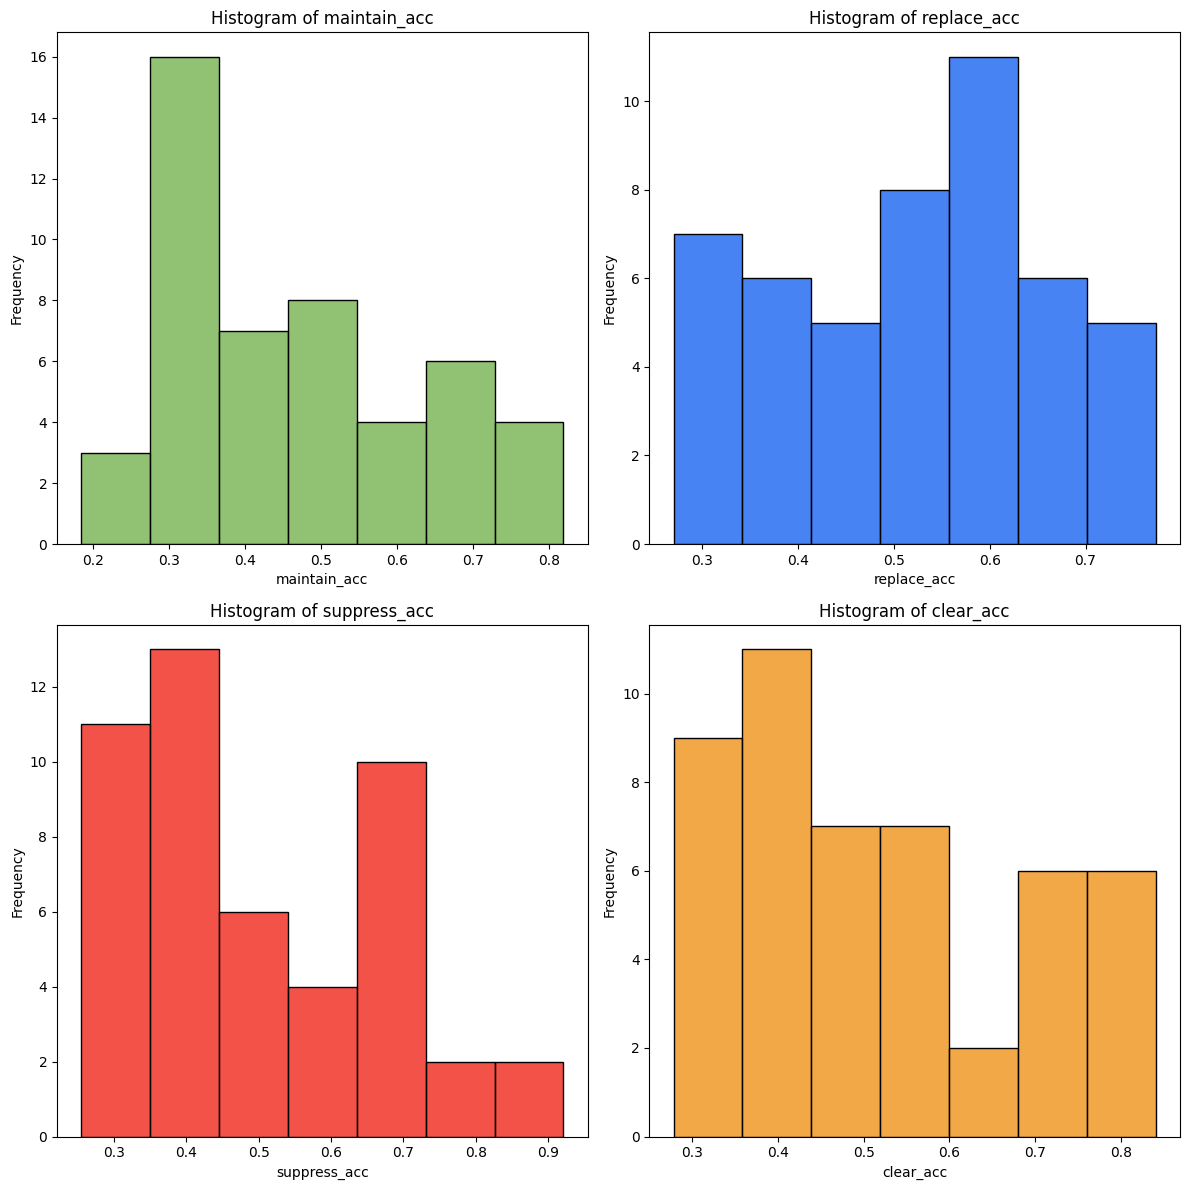

The column with the highest variance is 'suppress_acc' with a variance of 0.03.


In [25]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns of interest
columns_of_interest = ['maintain_acc', 'replace_acc', 'suppress_acc', 'clear_acc']

# Define the colors for the operations
ops_cols = ['#6DAE45', '#0A5AF0', '#F0180A', '#F08B0A']

# Create a 2x2 plot for histograms of each column
plt.figure(figsize=(12, 12))

for i, column in enumerate(columns_of_interest):
    plt.subplot(2, 2, i + 1)
    sns.histplot(task_rsa_disp[column], kde=False, color=ops_cols[i])
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate variance for each column
variances = task_rsa_disp[columns_of_interest].var()

# Determine which column has the highest variance
max_variance_column = variances.idxmax()
max_variance_value = variances.max()

print(f"The column with the highest variance is '{max_variance_column}' with a variance of {max_variance_value:.2f}.")


In [26]:
acc_output_regressions_table = format_og_regs(acc_output_regressions, 'acc')
acc_output_regressions_table

,data_type,parameter,fstat,r2,adjr2,std err,t,pval
0,acc,clear_acc,5.229,0.102,0.083,0.596,-2.287,0.0269
1,acc,maintain_acc,4.737,0.093,0.074,0.615,-2.176,0.0347
2,acc,replace_acc,1.866,0.039,0.018,0.758,-1.366,0.1790
3,acc,suppress_acc,5.115,0.100,0.081,0.587,-2.262,0.0285
4,acc,total_msc_acc,4.990,0.098,0.078,0.333,2.234,0.0304


In [27]:
#acc_output_regressions_table.melt(id_vars='formula').dropna().reset_index()

In [28]:
within_disp_list = [
 'main_vn_dispersion_md',
 'main_smn_dispersion_md',
 'main_fpcn_dispersion_md',
 'main_dmn_dispersion_md',
 'replace_vn_dispersion_md',
 'replace_smn_dispersion_md',
 'replace_fpcn_dispersion_md',
 'replace_dmn_dispersion_md',
 'suppress_vn_dispersion_md',
 'suppress_smn_dispersion_md',
 'suppress_fpcn_dispersion_md',
 'suppress_dmn_dispersion_md',
 'clear_vn_dispersion_md',
 'clear_smn_dispersion_md',
 'clear_fpcn_dispersion_md',
 'clear_dmn_dispersion_md']

rsa_within_disp_analysis = RegressionAnalysis(task_rsa_disp, within_disp_list)
rsa_within_disp_analysis.run_all_regressions()
rsa_within_disp_output_regressions = rsa_within_disp_analysis.get_combined_results()
rsa_within_disp_regression_models = rsa_within_disp_analysis.regression_models
rsa_within_disp_sig_vars = clean_formulas(rsa_within_disp_output_regressions)

fc_within_disp_analysis = RegressionAnalysis(task_fc_disp, within_disp_list)
fc_within_disp_analysis.run_all_regressions()
fc_within_disp_output_regressions = fc_within_disp_analysis.get_combined_results()
fc_within_disp_regression_models = fc_within_disp_analysis.regression_models
fc_within_disp_sig_vars = clean_formulas(fc_within_disp_output_regressions)

In [29]:
rsa_within_disp_sig_vars

['main_dmn_dispersion_md', 'replace_dmn_dispersion_md']

In [30]:
fc_within_disp_sig_vars

['replace_smn_dispersion_md',
 'suppress_fpcn_dispersion_md',
 'clear_dmn_dispersion_md']

In [31]:
rsa_within_disp_output_regressions_table = format_og_regs(rsa_within_disp_output_regressions, 'rsa within disp')
fc_within_disp_output_regressions_table = format_og_regs(fc_within_disp_output_regressions, 'fc within disp')

In [32]:
# Across Network Disperson Models

In [33]:
ecc_list = [
 'main_vn_eccentricity',
 'main_smn_eccentricity',
 'main_fpcn_eccentricity',
 'main_dmn_eccentricity',
 'replace_vn_eccentricity',
 'replace_smn_eccentricity',
 'replace_fpcn_eccentricity',
 'replace_dmn_eccentricity',
 'suppress_vn_eccentricity',
 'suppress_smn_eccentricity',
 'suppress_fpcn_eccentricity',
 'suppress_dmn_eccentricity',
 'clear_vn_eccentricity',
 'clear_smn_eccentricity',
 'clear_fpcn_eccentricity',
 'clear_dmn_eccentricity']

fc_ids = task_fc_disp.SubID.to_list()
rsa_ecc_analysis = RegressionAnalysis(task_rsa_disp, ecc_list)
rsa_ecc_analysis.run_all_regressions()
rsa_ecc_output_regressions = rsa_ecc_analysis.get_combined_results()
rsa_ecc_regression_models = rsa_ecc_analysis.regression_models
rsa_ecc_sig_vars = clean_formulas(rsa_ecc_output_regressions)

fc_ecc_analysis = RegressionAnalysis(task_fc_disp, ecc_list)
fc_ecc_analysis.run_all_regressions()
fc_ecc_output_regressions = fc_ecc_analysis.get_combined_results()
fc_ecc_regression_models = fc_ecc_analysis.regression_models
fc_ecc_sig_vars = clean_formulas(fc_ecc_output_regressions)

In [34]:
rsa_ecc_sig_vars

['suppress_vn_eccentricity', 'suppress_dmn_eccentricity']

In [35]:
fc_ecc_sig_vars 

['main_dmn_eccentricity']

In [36]:
rsa_ecc_output_regressions_table = format_og_regs(rsa_ecc_output_regressions, 'rsa ecc')
fc_ecc_output_regressions_table = format_og_regs(fc_ecc_output_regressions, 'fc ecc')

In [37]:
import pandas as pd
import statsmodels.formula.api as smf

class RegressionAnalysis:
    def __init__(self, data, variable_list, control_variable_list, target='thought_problems', interaction=True):
        self.data = data
        self.variable_list = variable_list
        self.control_variable_list = control_variable_list
        self.target = target
        self.interaction = interaction
        self.regression_results = {}
        self.regression_models = {}

    def run_regression(self, target, y_var, control_var):
        # Construct the formula
        formula = f'{target} ~ {y_var} + {control_var}'
        
        # Run the regression model
        model = smf.ols(formula=formula, data=self.data).fit()
        summary = model.summary()
        
        # Extract R-squared and p-value summary info
        var = pd.DataFrame(summary.tables[0].data).iloc[0, 1]
        table1 = pd.DataFrame(summary.tables[0].data).iloc[:4, 3:].T.assign(var=var)
        table1.columns = ['r2', 'adjr2', 'fstat', 'pval', 'var']
        table1 = table1[['var', 'r2', 'adjr2', 'fstat', 'pval']]

        # Extract coefficients and other model statistics
        table2_cols = pd.DataFrame(summary.tables[1].data).loc[0].to_list() + ['var']
        table2_cols[0] = 'parameter'
        table2 = pd.DataFrame(summary.tables[1].data).iloc[1:].assign(var=var)
        table2.columns = table2_cols
        table2 = table2[['var', 'parameter', 'coef', 'std err', 't', 'P>|t|']]

        # Merge and clean up the results into one DataFrame
        df = pd.merge(table1, table2, how='outer', left_on='var', right_on='parameter')
        df['var'] = df['var_x'].fillna(df['var_y'])
        df.drop(columns=['var_x', 'var_y'], inplace=True)
        df = df[['var'] + [col for col in df.columns if col != 'var']]
        df = df.assign(formula=formula)

        return df, model

    def run_all_regressions(self):
        # Run regressions for each pair of eccentricity and dispersion metrics
        for ecc_metric, disp_metric in zip(self.variable_list, self.control_variable_list):
            df, model = self.run_regression(self.target, ecc_metric, disp_metric)
            self.regression_results[ecc_metric] = df
            self.regression_models[ecc_metric] = model

    def get_combined_results(self):
        combined_results = []
        for metric in self.regression_results:
            combined_results.append(self.regression_results[metric])

        output_regressions = pd.concat(combined_results, ignore_index=True)
        
        # Convert columns to numeric as needed
        columns_to_convert = ['r2', 'adjr2', 'fstat', 'pval', 'coef', 'std err', 't', 'P>|t|']
        for column in columns_to_convert:
            output_regressions[column] = pd.to_numeric(output_regressions[column], errors='coerce')

        return output_regressions
    
def clean_formulas(dataframe, pval_threshold=0.05, target_prefix='thought_problems ~ '):
    """
    Filters formulas in a DataFrame based on p-value and removes the target prefix from each formula.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the regression results.
    pval_threshold (float): The p-value threshold for filtering formulas. Default is 0.05.
    target_prefix (str): The prefix to remove from each formula. Default is 'thought_problems ~ '.

    Returns:
    list: A list of cleaned formulas.
    """
    filtered_formulas = dataframe.query('pval < @pval_threshold').formula.to_list()
    cleaned_formulas = [formula.replace(target_prefix, '') for formula in filtered_formulas]
    return cleaned_formulas

def format_og_regs(regressions_table, neural_met):
    """
    Formats the output of regression results for clear display by filtering out intercepts,
    reshaping the data, and adding a 'data_type' column to denote the neural metric.

    Parameters:
    regressions_table (pd.DataFrame): The DataFrame containing regression results.
    neural_met (str): The neural metric label to add to the output.

    Returns:
    pd.DataFrame: The formatted DataFrame with specified columns and data type label.
    """
    # Filter out intercepts
    regressions_table = regressions_table.query('parameter != "Intercept"')
    
    # Reshape the table for easier formatting
    outs = (
        regressions_table
        .melt(id_vars='formula')
        .dropna()
        .query('value != "thought_problems"')
        .reset_index()
        .pivot(index=['index', 'formula'], columns='variable', values='value')
    ).reset_index().sort_values('formula')

    # Aggregate and structure data based on 'formula'
    agg_funcs = {col: 'first' for col in outs.columns if col != 'formula'}
    collapsed_df = outs.groupby('formula').agg(agg_funcs).reset_index().assign(data_type=neural_met)

    # Reorder columns for the final output
    collapsed_df = collapsed_df[['data_type', 'parameter', 'fstat', 'r2', 'adjr2', 'std err', 't', 'pval']]
    
    return collapsed_df


ecc_list = [
 'main_vn_eccentricity', 'main_smn_eccentricity', 'main_fpcn_eccentricity', 'main_dmn_eccentricity',
 'replace_vn_eccentricity', 'replace_smn_eccentricity', 'replace_fpcn_eccentricity', 'replace_dmn_eccentricity',
 'suppress_vn_eccentricity', 'suppress_smn_eccentricity', 'suppress_fpcn_eccentricity', 'suppress_dmn_eccentricity',
 'clear_vn_eccentricity', 'clear_smn_eccentricity', 'clear_fpcn_eccentricity', 'clear_dmn_eccentricity']

within_disp_list = [
 'main_vn_dispersion_md', 'main_smn_dispersion_md', 'main_fpcn_dispersion_md', 'main_dmn_dispersion_md',
 'replace_vn_dispersion_md', 'replace_smn_dispersion_md', 'replace_fpcn_dispersion_md', 'replace_dmn_dispersion_md',
 'suppress_vn_dispersion_md', 'suppress_smn_dispersion_md', 'suppress_fpcn_dispersion_md', 'suppress_dmn_dispersion_md',
 'clear_vn_dispersion_md', 'clear_smn_dispersion_md', 'clear_fpcn_dispersion_md', 'clear_dmn_dispersion_md']

# Run RSA analysis
rsa_ecc_analysis = RegressionAnalysis(task_rsa_disp, ecc_list, within_disp_list)
rsa_ecc_analysis.run_all_regressions()
rsa_ecc_output_regressions = rsa_ecc_analysis.get_combined_results()
rsa_ecc_sig_vars = clean_formulas(rsa_ecc_output_regressions)

# Run FC analysis
fc_ecc_analysis = RegressionAnalysis(task_fc_disp, ecc_list, within_disp_list)
fc_ecc_analysis.run_all_regressions()
fc_ecc_output_regressions = fc_ecc_analysis.get_combined_results()
fc_ecc_sig_vars = clean_formulas(fc_ecc_output_regressions)

rsa_ecc_sig_vars_form = ['thought_problems ~ ' + var for var in rsa_ecc_sig_vars]
fc_ecc_sig_vars_form = ['thought_problems ~ ' + var for var in fc_ecc_sig_vars]

In [38]:
#rsa_ecc_output_regressions.query('formula in @rsa_ecc_sig_vars_form')

In [39]:
fc_ecc_sig_vars

['main_fpcn_eccentricity + main_fpcn_dispersion_md',
 'main_dmn_eccentricity + main_dmn_dispersion_md',
 'suppress_fpcn_eccentricity + suppress_fpcn_dispersion_md']

In [40]:
# Loading data
task_fc_gt = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/regressions/data/task/graph_theory_metrics_z.csv')
task_fc_gt_cosine = task_fc_gt.query('method == "cosine"').drop('method', axis=1)
task_fc_gt_spearman = task_fc_gt.query('method == "spearman"').drop('method', axis=1)

In [41]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools

class RegressionAnalysis:
    def __init__(self, data, variable_list, target='thought_problems', interaction=None):
        self.data = data
        self.variable_list = variable_list
        self.target = target
        self.interaction = interaction
        self.regression_results = {}
        self.regression_models = {}

    def run_regression(self, target, y_vars):
        if self.interaction is not None:
            if len(y_vars) > 1:
                joined_vars = ' * '.join(y_vars)
            else:
                joined_vars = y_vars[0]
            formula = f'{target} ~ {joined_vars}'
        else:
            joined_vars = ' + '.join(y_vars)
            formula = f'{target} ~ {joined_vars}'

        model = smf.ols(formula=formula, data=self.data).fit()
        summary = model.summary()
        var = pd.DataFrame(summary.tables[0].data).iloc[0, 1]

        table1 = pd.DataFrame(summary.tables[0].data).iloc[:4, 3:].T.assign(var=var)
        table1.columns = ['r2', 'adjr2', 'fstat', 'pval', 'var']
        table1 = table1[['var', 'r2', 'adjr2', 'fstat', 'pval']]

        table2_cols = pd.DataFrame(summary.tables[1].data).loc[0].to_list() + ['var']
        table2_cols[0] = 'parameter'
        table2 = pd.DataFrame(summary.tables[1].data).iloc[1:].assign(var=var)
        table2.columns = table2_cols
        table2 = table2[['var', 'parameter', 'coef', 'std err', 't', 'P>|t|']]

        df = pd.merge(table1, table2, how='outer', left_on='var', right_on='parameter')
        df['var'] = df['var_x'].fillna(df['var_y'])
        df.drop(columns=['var_x', 'var_y'], inplace=True)
        df = df[['var'] + [col for col in df.columns if col != 'var']]
        df = df.assign(formula=formula)

        return df, model

    def run_all_regressions(self):
        for metric in self.variable_list:
            df, model = self.run_regression(self.target, [metric])
            self.regression_results[metric] = df
            self.regression_models[metric] = model

    def get_combined_results(self):
        combined_results = []
        for metric in self.regression_results:
            combined_results.append(self.regression_results[metric])

        output_regressions = pd.concat(combined_results, ignore_index=True)
        columns_to_convert = ['r2', 'adjr2', 'fstat', 'pval', 'coef', 'std err', 't', 'P>|t|']
        for column in columns_to_convert:
            output_regressions[column] = pd.to_numeric(output_regressions[column], errors='coerce')

        return output_regressions
    
def clean_formulas(dataframe, pval_threshold=0.05, target_prefix='thought_problems ~ '):
    """
    Filters formulas in a DataFrame based on p-value and removes the target prefix from each formula.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the regression results.
    pval_threshold (float): The p-value threshold for filtering formulas. Default is 0.05.
    target_prefix (str): The prefix to remove from each formula. Default is 'thought_problems ~ '.

    Returns:
    list: A list of cleaned formulas.
    """
    filtered_formulas = dataframe.query('pval < @pval_threshold').formula.to_list()
    cleaned_formulas = [formula.replace(target_prefix, '') for formula in filtered_formulas]
    return cleaned_formulas

In [42]:
import pandas as pd

# Assuming 'task_rsa_gt_cosine' is your DataFrame
# Defining the measure names to filter
measure_names = [
    'eigenvector_centrality', 
    #'betweenness_centrality', 
    'clustering_coefficient',
    #'modularity'
]

# Creating a regex pattern from the measure names
pattern = '|'.join(measure_names)

# Filtering columns that match the pattern
gt_predictors = task_fc_gt_cosine.filter(regex=pattern).columns.to_list()
#gt_predictors = task_rsa_gt_cosine.iloc[:, 3:].columns.to_list()
# Display the filtered columns

In [43]:
# Graph Theory Cosine Models

In [44]:
fc_gt_cosine_analysis = RegressionAnalysis(task_fc_gt_cosine, gt_predictors)
fc_gt_cosine_analysis.run_all_regressions()
fc_gt_cosine_output_regressions = fc_gt_cosine_analysis.get_combined_results()
fc_gt_cosine_regression_models = fc_gt_cosine_analysis.regression_models
fc_gt_cosine_sig_vars = clean_formulas(fc_gt_cosine_output_regressions)

In [45]:
#fc_gt_cosine_sig_vars 

In [46]:
# Graph Theory Spearman Models

In [47]:
#rsa_gt_spearman_analysis = RegressionAnalysis(task_rsa_gt_spearman, gt_predictors)
#rsa_gt_spearman_analysis.run_all_regressions()
#rsa_gt_spearman_output_regressions = rsa_gt_spearman_analysis.get_combined_results()
#rsa_gt_spearman_regression_models = rsa_gt_spearman_analysis.regression_models
#rsa_gt_spearman_sig_vars = clean_formulas(rsa_gt_spearman_output_regressions)

fc_gt_spearman_analysis = RegressionAnalysis(task_fc_gt_spearman, gt_predictors)
fc_gt_spearman_analysis.run_all_regressions()
fc_gt_spearman_output_regressions = fc_gt_spearman_analysis.get_combined_results()
fc_gt_spearman_regression_models = fc_gt_spearman_analysis.regression_models
fc_gt_spearman_sig_vars = clean_formulas(fc_gt_spearman_output_regressions)

In [48]:
fc_gt_spearman_sig_vars

[]

In [49]:
fc_gt_cosine_regressions_table = format_og_regs(fc_gt_cosine_output_regressions, 'fc gt')
fc_gt_spearman_regressions_table = format_og_regs(fc_gt_spearman_output_regressions, 'fc gt')

fc_gt_regressions_table = pd.concat([fc_gt_cosine_regressions_table, fc_gt_spearman_regressions_table]).sort_values('pval').drop_duplicates('parameter', keep='first')

In [50]:
acc_output_regressions_table

,data_type,parameter,fstat,r2,adjr2,std err,t,pval
0,acc,clear_acc,5.229,0.102,0.083,0.596,-2.287,0.0269
1,acc,maintain_acc,4.737,0.093,0.074,0.615,-2.176,0.0347
2,acc,replace_acc,1.866,0.039,0.018,0.758,-1.366,0.1790
3,acc,suppress_acc,5.115,0.100,0.081,0.587,-2.262,0.0285
4,acc,total_msc_acc,4.990,0.098,0.078,0.333,2.234,0.0304


In [51]:
def run_rest(rest, data_type):
    
    rest_list =['rest_vn_eccentricity',
            'rest_smn_eccentricity',
            'rest_fpcn_eccentricity',
            'rest_dmn_eccentricity',
            'rest_vn_dispersion_md',
            'rest_smn_dispersion_md',
            'rest_fpcn_dispersion_md',
            'rest_dmn_dispersion_md']

    rest_analysis = RegressionAnalysis(rest, rest_list)
    rest_analysis.run_all_regressions()
    rest_output_regressions = rest_analysis.get_combined_results()
    rest_regression_models = rest_analysis.regression_models
    rest_sig_vars = clean_formulas(rest_output_regressions)

    rest_output_regressions = (
        rest_output_regressions
        .assign(Data=data_type)
        .query('parameter != "Intercept"')
        #.query('pval.isna()')
        .round(3)
    )

    rest_output_regressions.formula = (rest_output_regressions.formula
                                          .str.replace('thought_problems ~ ', "")
                                          .str.replace('rest', "")
                                          .str.replace('vn', "Vwm")
                                          .str.replace('smn', "SMwm")
                                          .str.replace('fpcn', "FPCwm")
                                          .str.replace('dmn', "DMwm")
                                          .str.replace('eccentricity', "ecc.")
                                          .str.replace('dispersion_md', "disp.")
                                          .str.replace('_', " ")
                                         )

    rest_output_regressions = rest_output_regressions[['Data', 'formula', 'fstat', 'adjr2','t', 'pval']]

    rest_output_regressions.columns = ['Data', 'Parameter', '𝐹', 'Adj. R²', 't', '𝑝']

    rest_output_regressions = (rest_output_regressions
     .melt(id_vars = ['Data', 'Parameter'])
     .dropna()
     .pivot(index=['Data', 'Parameter'], columns='variable', values='value')
    ).iloc[::-1].reset_index()
    
    rest_output_regressions['Parameter'] = 'rest ' + rest_output_regressions['Parameter']
    
    return rest_output_regressions

rest_fc = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/rest/rest_all_metrics_zp.csv')
rest_rsa = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/rest/rest_rsa_all_metrics_zp.csv')
rest_rsa.columns = rest_rsa.columns.str.replace('_rsa_', '_')

rest_table = pd.concat([run_rest(rest_rsa, 'RSA'), run_rest(rest_fc, 'Connectivity')]).reset_index(drop=True)

In [52]:
# Function to get sort keys for the Data column
def get_data_sort_key(data):
    return data_order.index(data) if data in data_order else len(data_order)

# Function to get sort keys for the Parameter column
def get_parameter_sort_keys(param):
    # Determine the keyword part of the string
    keyword_key = next((keyword for keyword in keyword_order if keyword in param), "")
    keyword_index = keyword_order.index(keyword_key) if keyword_key else len(keyword_order)
    
     # Determine the measurement part of the string
    measurement_key = next((measure for measure in measurement_order if measure in param), "")
    measurement_index = measurement_order.index(measurement_key) if measurement_key else len(measurement_order)
    
    # Determine the network part of the string
    network_key = next((network for network in network_order if network in param), "")
    network_index = network_order.index(network_key) if network_key else len(network_order)
    
    return (keyword_index, measurement_index, network_index)

# Define a function to assign significance levels based on p-values
def assign_significance(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    elif p_value < 0.1:
        return '.'
    else:
        return ''
    

# Define the replacement function for the 'Parameter' column
def format_parameter(param):
    param = param.replace('main_', 'maintain_')
    param = param.replace('rsa', 'RSA').replace('fc', 'FC')
    param = param.replace('vn', 'Vwm').replace('smn', 'SMwm')
    param = param.replace('fpcn', 'FPCwm').replace('dmn', 'DMwm')
    param = param.replace('dispersion', 'disp.').replace('eccentricity', 'ecc.')
    param = param.replace('_md', '_').replace('acc', 'accuracy')
    param = param.replace('_', ' ').replace('total msc accuracy', 'accuracyPC')
    return param


In [53]:
all_sig_og_regression_table = (pd.concat([
                                          acc_output_regressions_table,
                                          rsa_within_disp_output_regressions_table.query('pval < .1'), 
                                          fc_within_disp_output_regressions_table.query('pval < .1'),
                                          rsa_ecc_output_regressions_table.query('pval < .1'),
                                          fc_ecc_output_regressions_table.query('pval < .1'), 
                                         ])
                               .sort_values(['data_type', 'fstat'], ascending=[True, False])
                               .drop(['r2', 'std err'], axis=1)
                              )

# Apply the function to the 'pval' column to create a new 'significance' column
#all_sig_og_regression_table['significance'] = all_sig_og_regression_table['pval'].apply(assign_significance)

all_sig_og_regression_table = all_sig_og_regression_table.rename(
    {
        'data_type': 'Data',
        'fstat': '𝐹',      # Italic F using Unicode
        'pval': '𝑝',            # Italic p using Unicode
        'adjr2': 'Adj. R²',  # R-squared with superscript
        't-': '𝑡',             # Italic t using Unicode,
        'parameter':'Parameter'
    },
    axis=1
)

# Define the replacement mappings for the 'Data' column
data_replacements = {
    'acc': 'Whole Brain Accuracy',
    'fc ecc': 'Connectivity',
    'rsa ecc': 'RSA',
    'rsa within disp': 'RSA',
    'fc within disp': 'Connectivity'
}

# Apply replacements to the 'Data' column
all_sig_og_regression_table['Data'] = all_sig_og_regression_table['Data'].replace(data_replacements)

# Apply formatting function to the 'Parameter' column
all_sig_og_regression_table['Parameter'] = all_sig_og_regression_table['Parameter'].apply(format_parameter)

# Define the order for the Data clumn
data_order = ['Whole Brain Accuracy', 'RSA', 'Connectivity']
# Define the order for the keywords, networks, and measurement types in the Parameter column
keyword_order = ['maintain', 'replace', 'suppress', 'clear']
network_order = ['Vwm', 'SMwm', 'FPCwm', 'DMwm']
measurement_order = ['ecc.', 'disp.']

# Sort the DataFrame by Data first, then by Parameter
all_sig_og_regression_table = all_sig_og_regression_table.sort_values(
    by=['Data', 'Parameter'],
    key=lambda x: x.map(get_data_sort_key) if x.name == 'Data' else x.map(get_parameter_sort_keys)
)


# Display the updated table
all_sig_og_regression_table.to_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/regressions/sig_neural_metrics_table.csv', index=False)

In [54]:
all_sig_og_regression_table.round(3)

,Data,Parameter,𝐹,Adj. R²,t,𝑝
1,Whole Brain Accuracy,maintain accuracy,4.737,0.074,-2.176,0.035
2,Whole Brain Accuracy,replace accuracy,1.866,0.018,-1.366,0.179
3,Whole Brain Accuracy,suppress accuracy,5.115,0.081,-2.262,0.028
0,Whole Brain Accuracy,clear accuracy,5.229,0.083,-2.287,0.027
4,Whole Brain Accuracy,accuracyPC,4.990,0.078,2.234,0.030
4,RSA,maintain DMwm disp.,6.921,0.112,2.631,0.012
8,RSA,replace DMwm disp.,4.347,0.066,2.085,0.043
15,RSA,suppress Vwm ecc.,5.540,0.088,2.354,0.023
12,RSA,suppress DMwm ecc.,9.494,0.153,-3.081,0.003
5,Connectivity,maintain FPCwm ecc.,3.225,0.057,1.796,0.081


In [55]:
rsa_within_disp_output_regressions_table = format_og_regs(rsa_within_disp_output_regressions, 'rsa within disp')
fc_within_disp_output_regressions_table = format_og_regs(fc_within_disp_output_regressions, 'fc within disp')

all_og_regression_table = (pd.concat([
                                      acc_output_regressions_table,
                                      rsa_within_disp_output_regressions_table, 
                                      fc_within_disp_output_regressions_table,
                                      rsa_ecc_output_regressions_table,
                                      fc_ecc_output_regressions_table, 
                                     ])
                          )

all_og_regression_table = (all_og_regression_table
                           .sort_values('data_type')
                           .drop(['std err', 'r2'], axis=1)
                           .round(3)
                          )

all_og_regression_table = all_og_regression_table.rename(
    {
        'data_type': 'Data',
        'fstat': '𝐹',      # Italic F using Unicode
        'pval': '𝑝',            # Italic p using Unicode
        'adjr2': 'Adj. R²',  # R-squared with superscript
        't-value': '𝑡',             # Italic t using Unicode,
        'parameter':'Parameter'
    },
    axis=1
)

# Define the replacement mappings for the 'Data' column
data_replacements = {
    'acc': 'Whole Brain Accuracy',
    'fc ecc': 'Connectivity',
    'rsa ecc': 'RSA',
    'rsa within disp': 'RSA',
    'fc within disp': 'Connectivity'
}

# Define the replacement function for the 'Parameter' column
def format_parameter(param):
    param = param.replace('main_', 'maintain_')
    param = param.replace('rsa', 'RSA').replace('fc', 'FC')
    param = param.replace('vn', 'Vwm').replace('smn', 'SMwm')
    param = param.replace('fpcn', 'FPCwm').replace('dmn', 'DMwm')
    param = param.replace('dispersion', 'disp.').replace('eccentricity', 'ecc.')
    param = param.replace('_md', '_').replace('acc', 'accuracy')
    param = param.replace('_', ' ').replace('total msc accuracy', 'accuracyPC')
    return param

# Apply replacements to the 'Data' column
all_og_regression_table['Data'] = all_og_regression_table['Data'].replace(data_replacements)

# Apply formatting function to the 'Parameter' column
all_og_regression_table['Parameter'] = all_og_regression_table['Parameter'].apply(format_parameter)

# Define the order for the Data clumn
data_order = ['Whole Brain Accuracy', 'RSA', 'Connectivity']
# Define the order for the keywords, networks, and measurement types in the Parameter column
keyword_order = ['maintain', 'replace', 'suppress', 'clear']
network_order = ['Vwm', 'SMwm', 'FPCwm', 'DMwm']
measurement_order = ['ecc.', 'disp.']

# Function to get sort keys for the Data column
def get_data_sort_key(data):
    return data_order.index(data) if data in data_order else len(data_order)

# Function to get sort keys for the Parameter column
def get_parameter_sort_keys(param):
    # Determine the keyword part of the string
    keyword_key = next((keyword for keyword in keyword_order if keyword in param), "")
    keyword_index = keyword_order.index(keyword_key) if keyword_key else len(keyword_order)
    
     # Determine the measurement part of the string
    measurement_key = next((measure for measure in measurement_order if measure in param), "")
    measurement_index = measurement_order.index(measurement_key) if measurement_key else len(measurement_order)
    
    # Determine the network part of the string
    network_key = next((network for network in network_order if network in param), "")
    network_index = network_order.index(network_key) if network_key else len(network_order)
    
    return (keyword_index, measurement_index, network_index)

all_og_regression_table = pd.concat([all_og_regression_table, rest_table])
# Sort the DataFrame by Data first, then by Parameter
all_og_regression_table = all_og_regression_table.sort_values(
    by=['Data', 'Parameter'],
    key=lambda x: x.map(get_data_sort_key) if x.name == 'Data' else x.map(get_parameter_sort_keys)
)



# Step 1: Split "Parameter" into "Operation/Rest" and "Metric"
all_og_regression_table["Operation/Rest"] = all_og_regression_table["Parameter"].str.extract(r'^(maintain|suppress|clear|replace|rest|accuracyPC)', expand=False)
all_og_regression_table["Metric"] = all_og_regression_table["Parameter"].str.extract(r'(accuracy|disp\.|ecc\.)', expand=False)

# Step 2: Replace disp. and ecc. with full names
all_og_regression_table["Metric"] = all_og_regression_table["Metric"].replace({"disp.": "dispersion", "ecc.": "eccentricity"})

# Step 3: Extract "Network" information for rows with "rest" in Parameter
all_og_regression_table["Network"] = all_og_regression_table["Parameter"].str.extract(r'(\w+wm)', expand=False)

# Step 4: Handle "Whole Brain Accuracy" rows - set Network to blank
all_og_regression_table.loc[all_og_regression_table["Data"] == "Whole Brain Accuracy", "Network"] = ""

# Drop the original "Parameter" column
all_og_regression_table = all_og_regression_table.drop(columns=["Parameter"])

all_og_regression_table = all_og_regression_table[['Data', 'Operation/Rest', 'Metric','Network', '𝐹', 'Adj. R²', 't', '𝑝']]

# Display the sorted DataFrame
all_og_regression_table.to_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/regressions/all_metrics_table.csv', index=False)

In [56]:
all_og_regression_table

,Data,Operation/Rest,Metric,Network,𝐹,Adj. R²,t,𝑝
1,Whole Brain Accuracy,maintain,accuracy,,4.737,0.074,-2.176,0.035
2,Whole Brain Accuracy,replace,accuracy,,1.866,0.018,-1.366,0.179
3,Whole Brain Accuracy,suppress,accuracy,,5.115,0.081,-2.262,0.028
0,Whole Brain Accuracy,clear,accuracy,,5.229,0.083,-2.287,0.027
4,Whole Brain Accuracy,accuracyPC,accuracy,,4.990,0.078,2.234,0.030
...,...,...,...,...,...,...,...,...
14,Connectivity,rest,eccentricity,DMwm,0.418,-0.016,-0.646,0.522
9,Connectivity,rest,dispersion,Vwm,0.236,-0.021,0.486,0.630
11,Connectivity,rest,dispersion,SMwm,0.173,-0.022,0.416,0.680
13,Connectivity,rest,dispersion,FPCwm,2.465,0.037,1.570,0.125


In [57]:
all_og_regression_table[['Data', 'Operation/Rest', 'Metric','Network', '𝐹', 'Adj. R²', 't', '𝑝']]

,Data,Operation/Rest,Metric,Network,𝐹,Adj. R²,t,𝑝
1,Whole Brain Accuracy,maintain,accuracy,,4.737,0.074,-2.176,0.035
2,Whole Brain Accuracy,replace,accuracy,,1.866,0.018,-1.366,0.179
3,Whole Brain Accuracy,suppress,accuracy,,5.115,0.081,-2.262,0.028
0,Whole Brain Accuracy,clear,accuracy,,5.229,0.083,-2.287,0.027
4,Whole Brain Accuracy,accuracyPC,accuracy,,4.990,0.078,2.234,0.030
...,...,...,...,...,...,...,...,...
14,Connectivity,rest,eccentricity,DMwm,0.418,-0.016,-0.646,0.522
9,Connectivity,rest,dispersion,Vwm,0.236,-0.021,0.486,0.630
11,Connectivity,rest,dispersion,SMwm,0.173,-0.022,0.416,0.680
13,Connectivity,rest,dispersion,FPCwm,2.465,0.037,1.570,0.125


In [58]:
# 12/100 = 12% of the metrics significantly predicted thought contorl difficulties

In [59]:
print(f'The proportion of metrics significant {round((12/100)*100, 2)}% 18/212 including ACC')
print(f'The proportion of metrics significant {round((9/100)*100, 2)}% 15/208 not including ACC')

The proportion of metrics significant 12.0% 18/212 including ACC
The proportion of metrics significant 9.0% 15/208 not including ACC


In [60]:
acc_rsa_fc = pd.merge(task_rsa_disp[['SubID',
               'thought_problems',
               'total_msc_acc',
               'suppress_dmn_eccentricity',
               'suppress_vn_eccentricity',
               'replace_smn_dispersion_md',
               'main_dmn_dispersion_md',
               'replace_dmn_dispersion_md',
               'clear_dmn_dispersion_md',
               'suppress_fpcn_dispersion_md']],
         task_fc_disp[['SubID', 'main_dmn_eccentricity']],
         on='SubID')

In [61]:
#results.query('Significant == "Yes"').iloc[:, 0].to_list()

In [62]:
import pandas as pd
import statsmodels.formula.api as smf
from scipy.stats import f

# Combine task_rsa_disp and task_fc_disp to create acc_rsa_fc DataFrame
acc_rsa_fc = pd.merge(
    task_rsa_disp[['SubID', 'thought_problems', 'total_msc_acc', 'suppress_dmn_eccentricity', 
                   'suppress_vn_eccentricity', 'replace_smn_dispersion_md', 'main_dmn_dispersion_md']],
    task_fc_disp[['SubID', 'main_dmn_eccentricity', 'replace_dmn_dispersion_md', 'clear_dmn_dispersion_md', 'suppress_fpcn_dispersion_md']],
    on='SubID'
)

# Define the original parameters only
original_params = [
    'suppress_dmn_eccentricity',
    'suppress_vn_eccentricity',
    'main_dmn_dispersion_md',
    'replace_smn_dispersion_md',
    'replace_dmn_dispersion_md',
    'suppress_fpcn_dispersion_md',
    'clear_dmn_dispersion_md'
]

# Define the nested models
nested_models = [f'total_msc_acc + {param}' for param in original_params]

# Define the final models
acc_and_rsa_and_fc = [
    'total_msc_acc + suppress_dmn_eccentricity + main_dmn_eccentricity',
    'total_msc_acc + suppress_vn_eccentricity + main_dmn_eccentricity',
    'total_msc_acc + main_dmn_dispersion_md + main_dmn_eccentricity',
    'suppress_fpcn_dispersion_md +  suppress_vn_eccentricity + main_dmn_eccentricity'
]

# Define the models to compare against (nested models)
comparison_models = [
    'total_msc_acc + suppress_dmn_eccentricity',
    'total_msc_acc + suppress_vn_eccentricity',
    'total_msc_acc + main_dmn_dispersion_md'
]

# Define a full model including all parameters
full_model_formula = (
    'total_msc_acc + '
    + ' + '.join(original_params)
    + ' + main_dmn_eccentricity'
)

# Function to run models and return fitted models
def run_and_return_models(model_formulas, data):
    models = {}
    for formula in model_formulas:
        model = smf.ols(formula=f'thought_problems ~ {formula}', data=data).fit()
        models[formula] = model
    return models

# Function to compare R-squared values between models
def compare_r_squared(base_model, nested_model):
    r_squared_diff = nested_model.rsquared - base_model.rsquared
    adj_r_squared_diff = nested_model.rsquared_adj - base_model.rsquared_adj
    n = base_model.nobs  
    k_base = base_model.df_model + 1  
    k_nested = nested_model.df_model + 1 
    
    f_statistic = (r_squared_diff / (k_nested - k_base)) / ((1 - nested_model.rsquared) / (n - k_nested))
    p_value = f.sf(f_statistic, k_nested - k_base, n - k_nested)
    
    return r_squared_diff, adj_r_squared_diff, f_statistic, p_value

# Fit models
msc_acc_model = run_and_return_models(['total_msc_acc'], task_rsa_disp)['total_msc_acc']
nested_model_objs = run_and_return_models(nested_models, task_rsa_disp)
comparison_model_objs = run_and_return_models(comparison_models, task_rsa_disp)
final_model_objs = run_and_return_models(acc_and_rsa_and_fc, acc_rsa_fc)
full_model_obj = run_and_return_models([full_model_formula], acc_rsa_fc)[full_model_formula]

In [63]:
#final_model_objs['suppress_fpcn_dispersion_md +  suppress_vn_eccentricity + main_dmn_eccentricity'].summary()

In [64]:
# Create comparison results table
results = pd.DataFrame(columns=[
    'Model Comparison', 'Base Model R-squared', 'Base Model Adjusted R-squared',
    'Nested Model R-squared', 'Nested Model Adjusted R-squared', 
    'R-squared Difference', 'Adjusted R-squared Difference', 
    'F-statistic', 'p-value', 'Significant'
])

# Compare nested models to msc_acc_model
for param in original_params:
    nested_model = nested_model_objs[f'total_msc_acc + {param}']
    r_squared_diff, adj_r_squared_diff, f_statistic, p_value = compare_r_squared(msc_acc_model, nested_model)
    results = results.append({
        'Model Comparison': f'total_msc_acc vs. total_msc_acc + {param}',
        'Base Model R-squared': msc_acc_model.rsquared,
        'Base Model Adjusted R-squared': msc_acc_model.rsquared_adj,
        'Nested Model R-squared': nested_model.rsquared,
        'Nested Model Adjusted R-squared': nested_model.rsquared_adj,
        'R-squared Difference': r_squared_diff,
        'Adjusted R-squared Difference': adj_r_squared_diff,
        'F-statistic': f_statistic,
        'p-value': p_value,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    }, ignore_index=True)

# Compare final models to comparison models
for final_model_formula, comparison_model_formula in zip(acc_and_rsa_and_fc, comparison_models):
    final_model = final_model_objs[final_model_formula]
    comparison_model = comparison_model_objs[comparison_model_formula]
    r_squared_diff, adj_r_squared_diff, f_statistic, p_value = compare_r_squared(comparison_model, final_model)
    results = results.append({
        'Model Comparison': f'{comparison_model_formula} vs. {final_model_formula}',
        'Base Model R-squared': comparison_model.rsquared,
        'Base Model Adjusted R-squared': comparison_model.rsquared_adj,
        'Nested Model R-squared': final_model.rsquared,
        'Nested Model Adjusted R-squared': final_model.rsquared_adj,
        'R-squared Difference': r_squared_diff,
        'Adjusted R-squared Difference': adj_r_squared_diff,
        'F-statistic': f_statistic,
        'p-value': p_value,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    }, ignore_index=True)

    
# Compare the largest final model to the full model
largest_final_model_formula = 'total_msc_acc + suppress_vn_eccentricity + main_dmn_eccentricity'
largest_final_model = final_model_objs[largest_final_model_formula]
r_squared_diff, adj_r_squared_diff, f_statistic, p_value = compare_r_squared(largest_final_model, full_model_obj)
results = results.append({
    'Model Comparison': f'{largest_final_model_formula} vs. {full_model_formula}',
    'Base Model R-squared': largest_final_model.rsquared,
    'Base Model Adjusted R-squared': largest_final_model.rsquared_adj,
    'Nested Model R-squared': full_model_obj.rsquared,
    'Nested Model Adjusted R-squared': full_model_obj.rsquared_adj,
    'R-squared Difference': r_squared_diff,
    'Adjusted R-squared Difference': adj_r_squared_diff,
    'F-statistic': f_statistic,
    'p-value': p_value,
    'Significant': 'Yes' if p_value < 0.05 else 'No'
}, ignore_index=True)

# Round results
results = results.round(3)

# Display results
# Define the replacements for formatting
replacements = {
    'total_msc_acc': 'accuracyPC',
    'msc_acc': 'accuracyPC',
    'main_': 'maintain_',
    'vn': 'V\u1D42\u1D50',
    'smn': 'SM\u1D42\u1D50',
    'fpcn': 'FPC\u1D42\u1D50',
    'dmn': 'DM\u1D42\u1D50',
    'dispersion': 'disp.',
    'eccentricity': 'ecc.',
    '_acc': 'acc.',
    '_': ' ',
    'md': ''
}

# Apply replacements to the 'Model Comparison' column
def replace_strings(text, replacements):
    if pd.isnull(text):
        return text
    for old, new in replacements.items():
        text = text.replace(old, new)
    return text

results['Model Comparison'] = results['Model Comparison'].apply(lambda x: replace_strings(x, replacements))

# Replace duplicate Model Comparisons with blanks
results['Model Comparison'] = results['Model Comparison'].where(~results['Model Comparison'].duplicated(), '')

# Replace NaN values with blanks
results = results.fillna('')

# Ensure columns are in a sensible order
results = results[['Model Comparison', 'Base Model Adjusted R-squared',
                   'Nested Model Adjusted R-squared',
                   'Adjusted R-squared Difference',
                   'F-statistic', 'p-value', 'Significant']]

# Save the formatted table to CSV
#results.to_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/regressions/formatted_model_comparison_table.csv', index=False)

# Display the formatted DataFrame (optional, for verification)
# Rename the columns with formatting for display purposes
results = results.rename(
    {
        'Adjusted R-squared Difference': 'Δ R²',
        'F-statistic': '𝐹',  # Italic F using Unicode
        'p-value': '𝑝',      # Italic p using Unicode
        'Base Model Adjusted R-squared': 'Base Model Adj. R²',
        'Nested Model Adjusted R-squared': 'Nested Model Adj. R²'
    },
    axis=1
)

# Save the formatted table to CSV
results.to_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/regressions/formatted_model_comparison_table.csv', index=False)

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define pairwise models to test for unique variance
pairwise_models = [
    'total_msc_acc + suppress_dmn_eccentricity + main_dmn_dispersion_md',
    'total_msc_acc + suppress_vn_eccentricity + main_dmn_dispersion_md',
    'total_msc_acc + suppress_dmn_eccentricity + suppress_vn_eccentricity'
]

# Fit pairwise models
pairwise_model_objs = run_and_return_models(pairwise_models, acc_rsa_fc)

# Compare R-squared for unique variance contribution
for formula in pairwise_models:
    base_model = comparison_model_objs['total_msc_acc + suppress_dmn_eccentricity']
    nested_model = pairwise_model_objs[formula]
    r_squared_diff, adj_r_squared_diff, f_statistic, p_value = compare_r_squared(base_model, nested_model)
    print(f"Model: {formula}")
    print(f"R-squared difference: {r_squared_diff:.4f}")
    print(f"Adjusted R-squared difference: {adj_r_squared_diff:.4f}")
    print(f"F-statistic: {f_statistic:.4f}, p-value: {p_value:.4f}\n")

# Calculate VIF to check for collinearity between the predictors
X = acc_rsa_fc[['suppress_dmn_eccentricity', 'main_dmn_dispersion_md']]
X.insert(0, 'Intercept', 1)  # Add intercept for VIF calculation

vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data


Model: total_msc_acc + suppress_dmn_eccentricity + main_dmn_dispersion_md
R-squared difference: 0.0791
Adjusted R-squared difference: 0.0526
F-statistic: 5.0771, p-value: 0.0293

Model: total_msc_acc + suppress_vn_eccentricity + main_dmn_dispersion_md
R-squared difference: 0.0726
Adjusted R-squared difference: 0.0456
F-statistic: 4.6188, p-value: 0.0372

Model: total_msc_acc + suppress_dmn_eccentricity + suppress_vn_eccentricity
R-squared difference: 0.1452
Adjusted R-squared difference: 0.1245
F-statistic: 10.3168, p-value: 0.0025



,Variable,VIF
0,Intercept,535.889507
1,suppress_dmn_eccentricity,1.000839
2,main_dmn_dispersion_md,1.000839


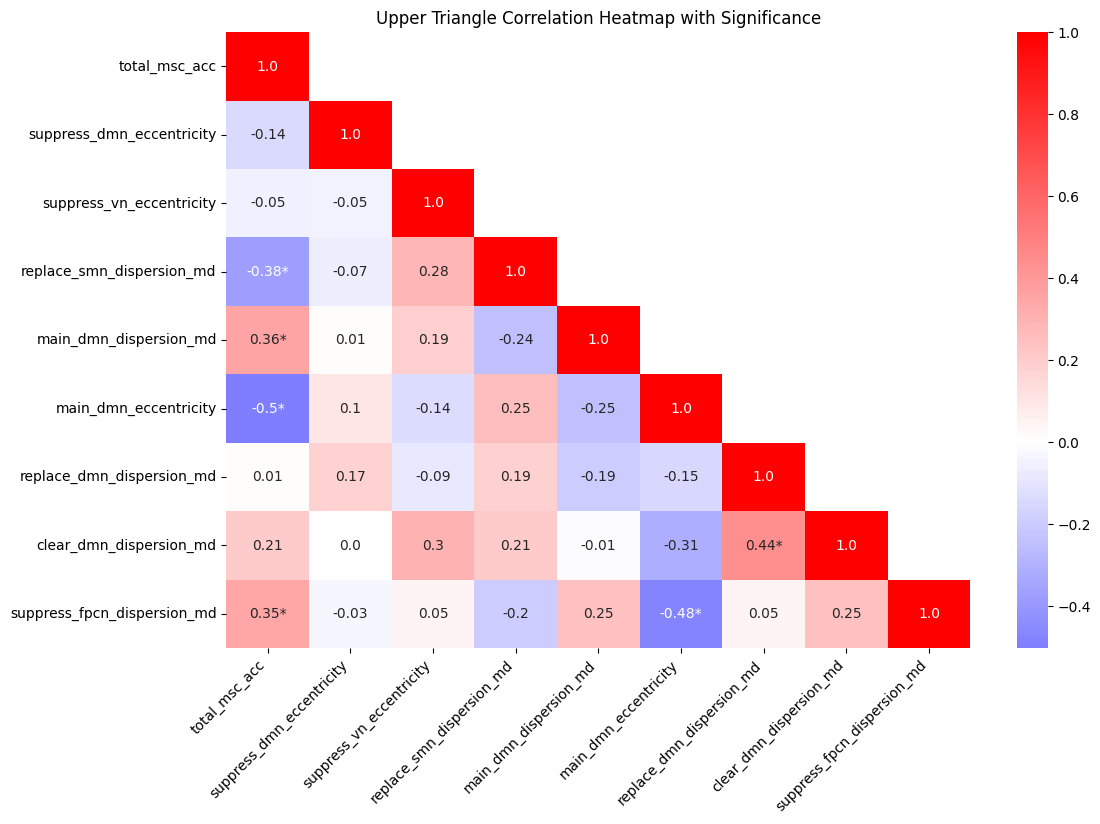

In [92]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `task_rsa_disp` is a DataFrame already loaded
columns_to_select = acc_rsa_fc.iloc[:, 2:].columns

# Select the specified columns
selected_columns_df = acc_rsa_fc[columns_to_select]

# Compute correlation matrix
cor_matrix = selected_columns_df.corr(method='spearman')

# Compute p-values for each pair of correlations
p_values = pd.DataFrame(np.ones(cor_matrix.shape), index=cor_matrix.index, columns=cor_matrix.columns)

for row in cor_matrix.index:
    for col in cor_matrix.columns:
        if row != col:
            corr, p_val = pearsonr(selected_columns_df[row], selected_columns_df[col])
            p_values.loc[row, col] = p_val

# Define significance threshold
significance_threshold = 0.05

# Create a mask for significant correlations
significant_mask = p_values < significance_threshold

# Annotate only significant correlations
annot = cor_matrix.copy().astype(str)
for row in cor_matrix.index:
    for col in cor_matrix.columns:
        annot_value = cor_matrix.loc[row, col].round(2)
        if significant_mask.loc[row, col]:
            annot.loc[row, col] = f"{annot_value}*"
        else:
            annot.loc[row, col] = str(annot_value)

# Create a mask for the upper triangle
mask = np.tril(np.ones_like(cor_matrix, dtype=bool))

# Apply the mask and set irrelevant values to NaN
masked_cor_matrix = cor_matrix.where(mask)

# Annotate only the significant correlations for the masked matrix
annot_masked = annot.where(mask)

# Plot the heatmap with rotation
plt.figure(figsize=(12, 8))
sns.heatmap(masked_cor_matrix, cmap='bwr', annot=annot_masked, fmt='', center=0, cbar=True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)              # Keep y-axis labels horizontal
plt.title("Upper Triangle Correlation Heatmap with Significance")
plt.show()

In [67]:
#acc_rsa_fc

In [68]:
import pandas as pd
import statsmodels.formula.api as smf

# Assuming all necessary data and models are already defined
# task_rsa_disp, task_fc_disp, acc_rsa_fc, msc_acc_model, nested_model_objs, 
# comparison_model_objs, final_model_objs, full_model_obj

# Combine all models into a single dictionary
all_models = {
    'msc_acc': msc_acc_model,
    **nested_model_objs,
    **comparison_model_objs,
    **final_model_objs,
    'full_model': full_model_obj
}

model_details = []

for model_name, model_obj in all_models.items():
    params = model_obj.params
    conf = model_obj.conf_int()
    model_fvalue = model_obj.fvalue
    model_f_pvalue = model_obj.f_pvalue
    model_r2 = model_obj.rsquared
    model_adj_r2 = model_obj.rsquared_adj

    # Add a row for overall model statistics
    model_details.append({
        'Model Formula': model_name,
        'Parameter': '',
        't-value': None,
        'p-value': None,
        'Model F-value': round(model_fvalue, 3),
        'Model F-pvalue': round(model_f_pvalue, 3),
        'Model R-squared': round(model_r2, 3),
        'Model Adjusted R-squared': round(model_adj_r2, 3)
    })

    # Add parameter-level rows
    for param_name in params.index:
        model_details.append({
            'Model Formula': model_name,
            'Parameter': param_name,
            't-value': round(model_obj.tvalues[param_name], 3),
            'p-value': round(model_obj.pvalues[param_name], 3),
            'Model F-value': None,
            'Model F-pvalue': None,
            'Model R-squared': None,
            'Model Adjusted R-squared': None
        })

# Create the DataFrame
model_outputs = pd.DataFrame(model_details)

# Define the replacements
replacements = {
    'total_msc_acc': 'accuracyPC',
    'msc_acc': 'accuracyPC',
    'main_': 'maintain_',
    'vn': 'V\u1D42\u1D50',
    'smn': 'SM\u1D42\u1D50',
    'fpcn': 'FPC\u1D42\u1D50',
    'dmn': 'DM\u1D42\u1D50',
    'dispersion': 'disp.',
    'eccentricity': 'ecc.',
    '_acc': 'acc.',
    '_': ' ',
    'md': '',
    'Overall Model': ''
   
}

# Apply replacements to 'Model Formula' and 'Parameter' columns
def replace_strings(text, replacements):
    if pd.isnull(text):
        return text
    for old, new in replacements.items():
        text = text.replace(old, new)
    return text

model_outputs['Model Formula'] = model_outputs['Model Formula'].apply(lambda x: replace_strings(x, replacements))
model_outputs['Parameter'] = model_outputs['Parameter'].apply(lambda x: replace_strings(x, replacements))

# Ensure columns are in a sensible order
model_outputs = model_outputs[['Model Formula',
                               'Model F-value', 'Model F-pvalue', 
                               'Model Adjusted R-squared', 'Parameter', 't-value', 'p-value']]

# Replace duplicate Model Formula entries with blanks
model_outputs['Model Formula'] = model_outputs['Model Formula'].where(~model_outputs['Model Formula'].duplicated(), '')

# Replace NaN values with blanks
model_outputs = model_outputs.fillna('')

model_outputs['p-value'] = model_outputs['Model F-pvalue'].astype(str) + model_outputs['p-value'].astype(str)
model_outputs.drop('Model F-pvalue', axis=1, inplace=True)

# Rename the columns with formatting for display purposes
model_outputs = model_outputs.rename(
    {
        'Model Formula': 'Model',
        'Model F-value': '𝐹',      # Italic F using Unicode
        'p-value': '𝑝',            # Italic p using Unicode
        'Model Adjusted R-squared': 'Adj. R²',  # R-squared with superscript
        't-value': '𝑡'             # Italic t using Unicode
    },
    axis=1
)

# Save to CSV
model_outputs.to_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/regressions/all_model_outputs_table.csv', index=False)


In [69]:
"""
This table presents the comparison between baseline models and nested models, where additional predictors were introduced to assess their impact on explaining variance in thought problems. The columns include the R-squared and adjusted R-squared values for both the base model and the nested model, the difference in these values between models, and the F-statistic and p-value resulting from the comparison. The F-statistic measures the improvement in model fit achieved by the nested model, while the p-value indicates whether this improvement is statistically significant (p < 0.05). A significant p-value suggests that the additional predictors in the nested model significantly enhance the model’s explanatory power compared to the baseline model. The "Significant" column denotes whether the improvement in fit is statistically significant.
"""

'\nThis table presents the comparison between baseline models and nested models, where additional predictors were introduced to assess their impact on explaining variance in thought problems. The columns include the R-squared and adjusted R-squared values for both the base model and the nested model, the difference in these values between models, and the F-statistic and p-value resulting from the comparison. The F-statistic measures the improvement in model fit achieved by the nested model, while the p-value indicates whether this improvement is statistically significant (p < 0.05). A significant p-value suggests that the additional predictors in the nested model significantly enhance the model’s explanatory power compared to the baseline model. The "Significant" column denotes whether the improvement in fit is statistically significant.\n'

In [70]:
def rest_model_comps(test, datatype):
    
    import pandas as pd
    import statsmodels.formula.api as smf
    from scipy.stats import f

    # Define task metrics
    dispersion_metrics = ['main_vn_dispersion_md', 'main_smn_dispersion_md', 'main_fpcn_dispersion_md', 'main_dmn_dispersion_md',
                          'replace_vn_dispersion_md', 'replace_smn_dispersion_md', 'replace_fpcn_dispersion_md', 'replace_dmn_dispersion_md',
                          'suppress_vn_dispersion_md', 'suppress_smn_dispersion_md', 'suppress_fpcn_dispersion_md', 'suppress_dmn_dispersion_md',
                          'clear_vn_dispersion_md', 'clear_smn_dispersion_md', 'clear_fpcn_dispersion_md', 'clear_dmn_dispersion_md']

    eccentricity_metrics = ['main_vn_eccentricity', 'main_smn_eccentricity', 'main_fpcn_eccentricity', 'main_dmn_eccentricity',
                            'replace_vn_eccentricity', 'replace_smn_eccentricity', 'replace_fpcn_eccentricity', 'replace_dmn_eccentricity',
                            'suppress_vn_eccentricity', 'suppress_smn_eccentricity', 'suppress_fpcn_eccentricity', 'suppress_dmn_eccentricity',
                            'clear_vn_eccentricity', 'clear_smn_eccentricity', 'clear_fpcn_eccentricity', 'clear_dmn_eccentricity']

    # Define rest metrics
    rest_dispersion_metrics = ['rest_vn_dispersion_md', 'rest_smn_dispersion_md', 'rest_fpcn_dispersion_md', 'rest_dmn_dispersion_md']
    rest_eccentricity_metrics = ['rest_vn_eccentricity', 'rest_smn_eccentricity', 'rest_fpcn_eccentricity', 'rest_dmn_eccentricity']

    # Initialize results
    results = []
    all_models = {}

    # Function to run regression models
    def run_model(formula, data):
        return smf.ols(formula=formula, data=data).fit()

    # Function to compare models
    def compare_models(base_model, nested_model):
        r_squared_diff = nested_model.rsquared - base_model.rsquared
        adj_r_squared_diff = nested_model.rsquared_adj - base_model.rsquared_adj
        n = base_model.nobs
        k_base = base_model.df_model + 1
        k_nested = nested_model.df_model + 1

        f_statistic = (r_squared_diff / (k_nested - k_base)) / ((1 - nested_model.rsquared) / (n - k_nested))
        p_value = f.sf(f_statistic, k_nested - k_base, n - k_nested)

        return r_squared_diff, adj_r_squared_diff, f_statistic, p_value

    # Analyze dispersion metrics
    for metric, rest_metric in zip(dispersion_metrics, rest_dispersion_metrics * (len(dispersion_metrics) // len(rest_dispersion_metrics))):
        base_formula = f'thought_problems ~ {metric}'
        base_model = run_model(base_formula, test)
        all_models[metric] = base_model

        nested_formula = f'thought_problems ~ {metric} + {rest_metric}'
        nested_model = run_model(nested_formula, test)
        all_models[f"{metric} + {rest_metric}"] = nested_model

        r_squared_diff, adj_r_squared_diff, f_statistic, p_value = compare_models(base_model, nested_model)
        results.append({
            'Model Comparison': f'{metric} vs. {metric} + {rest_metric}',
            'Base Model Adj. R²': base_model.rsquared_adj,
            'Nested Model Adj. R²': nested_model.rsquared_adj,
            'Δ R²': r_squared_diff,
            '𝐹': f_statistic,
            '𝑝': p_value,
            'Significant': 'Yes' if p_value < 0.05 else 'No'
        })

    # Analyze eccentricity metrics
    for metric, rest_metric in zip(eccentricity_metrics, rest_eccentricity_metrics * (len(eccentricity_metrics) // len(rest_eccentricity_metrics))):
        base_formula = f'thought_problems ~ {metric}'
        base_model = run_model(base_formula, test)
        all_models[metric] = base_model

        nested_formula = f'thought_problems ~ {metric} + {rest_metric}'
        nested_model = run_model(nested_formula, test)
        all_models[f"{metric} + {rest_metric}"] = nested_model

        r_squared_diff, adj_r_squared_diff, f_statistic, p_value = compare_models(base_model, nested_model)
        results.append({
            'Model Comparison': f'{metric} vs. {metric} + {rest_metric}',
            'Base Model Adj. R²': base_model.rsquared_adj,
            'Nested Model Adj. R²': nested_model.rsquared_adj,
            'Δ R²': r_squared_diff,
            '𝐹': f_statistic,
            '𝑝': p_value,
            'Significant': 'Yes' if p_value < 0.05 else 'No'
        })

    # Create comparison table
    comparison_results = pd.DataFrame(results)

    # Detailed model outputs
    model_details = []
    for model_name, model_obj in all_models.items():
        params = model_obj.params
        conf = model_obj.conf_int()
        model_fvalue = model_obj.fvalue
        model_f_pvalue = model_obj.f_pvalue
        model_r2 = model_obj.rsquared
        model_adj_r2 = model_obj.rsquared_adj

        model_details.append({
            'Model Formula': model_name,
            'Parameter': '',
            't-value': None,
            'p-value': None,
            'Model F-value': round(model_fvalue, 3),
            'Model F-pvalue': round(model_f_pvalue, 3),
            'Model R-squared': round(model_r2, 3),
            'Model Adjusted R-squared': round(model_adj_r2, 3)
        })

        for param_name in params.index:
            model_details.append({
                'Model Formula': model_name,
                'Parameter': param_name,
                't-value': round(model_obj.tvalues[param_name], 3),
                'p-value': round(model_obj.pvalues[param_name], 3),
                'Model F-value': None,
                'Model F-pvalue': None,
                'Model R-squared': None,
                'Model Adjusted R-squared': None
            })

    # Create DataFrame for model outputs
    model_outputs = pd.DataFrame(model_details)

    return model_outputs.assign(Data = datatype), comparison_results.assign(Data = datatype)

In [71]:
fc_task_filtered = task_fc_disp.filter(regex='SubID|dispersion_md|ecc')
fc_test = pd.merge(fc_task_filtered, rest_fc, on='SubID')
fc_rest_comp = rest_model_comps(fc_test, 'Functional Connectivity')[1]

rsa_task_filtered = task_rsa_disp.filter(regex='SubID|dispersion_md|ecc')
rsa_test = pd.merge(rsa_task_filtered, rest_rsa, on='SubID')
rsa_rest_comp = rest_model_comps(rsa_test, 'Rsa')[1]

In [72]:
rest_comps = pd.concat([rsa_rest_comp, fc_rest_comp]).round(3)

rest_comps = rest_comps[['Model Comparison', 'Base Model Adj. R²', 'Nested Model Adj. R²', 'Δ R²', '𝐹', '𝑝', 'Significant', 'Data']]

rest_comps['Model Comparison'] = rest_comps['Model Comparison'].apply(lambda x: replace_strings(x, replacements))

In [73]:
rest_comps.to_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/regressions/rest_comps.csv', index=False)